# Finding the Best Model
We will use our custom function to test which model parameters allow specparam to fit the most appropriate power spectra to our clustered data.

In [1]:
# General Imports to work with files
from scipy import io
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Specparam Functions
from specparam import SpectralGroupModel
from specparam.measures.error import compute_pointwise_error_group

# Custom Functions for Data Import and Cleaning
from cleanmodel_functions import *
from findBestModel import *

File appears to be MATLAB v7.3 format, loading with h5py...
Successfully loaded as HDF5/v7.3 file: ../results/exergame_session1_PowerSpectrumResults.mat
Available variables in .mat file:
  - #refs#: <class 'h5py._hl.group.Group'>
  - results: <class 'h5py._hl.group.Group'>
Results is a structured array (Group)
Available fields in results: ['cluster', 'component', 'experience', 'filename', 'freqs', 'icaact', 'session', 'spectra', 'subject']
Checking field 'subject' with shape: (6055, 1)
Determined 6055 entries from field 'subject'
Processing 6055 entries in results
Processed 500/6055 entries...
Processed 1000/6055 entries...
Processed 1500/6055 entries...
Processed 2000/6055 entries...
Processed 2500/6055 entries...
Processed 3000/6055 entries...
Processed 3500/6055 entries...
Processed 4000/6055 entries...
Processed 4500/6055 entries...
Processed 5000/6055 entries...
Processed 5500/6055 entries...
Processed 6000/6055 entries...

Extracted data summary:
  Total entries: 6055
  Unique su

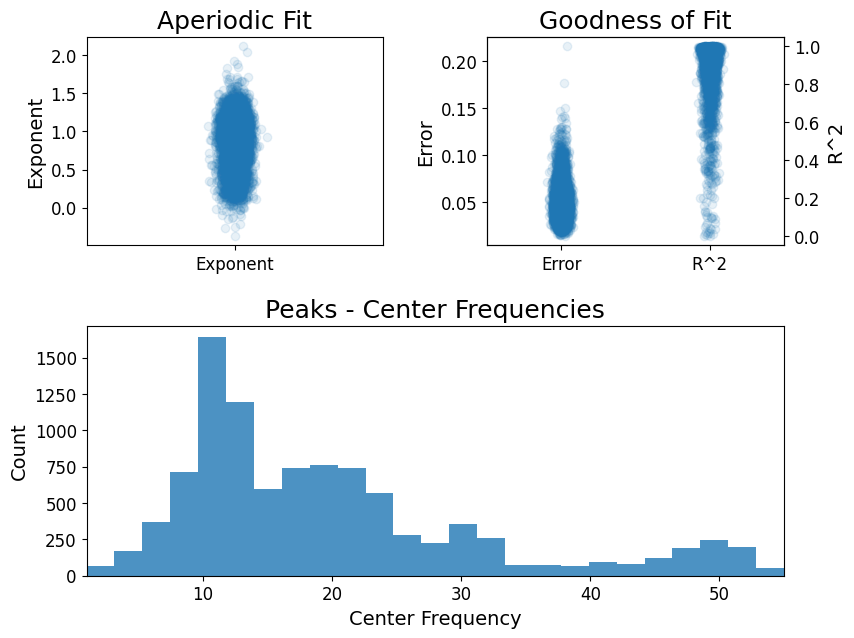

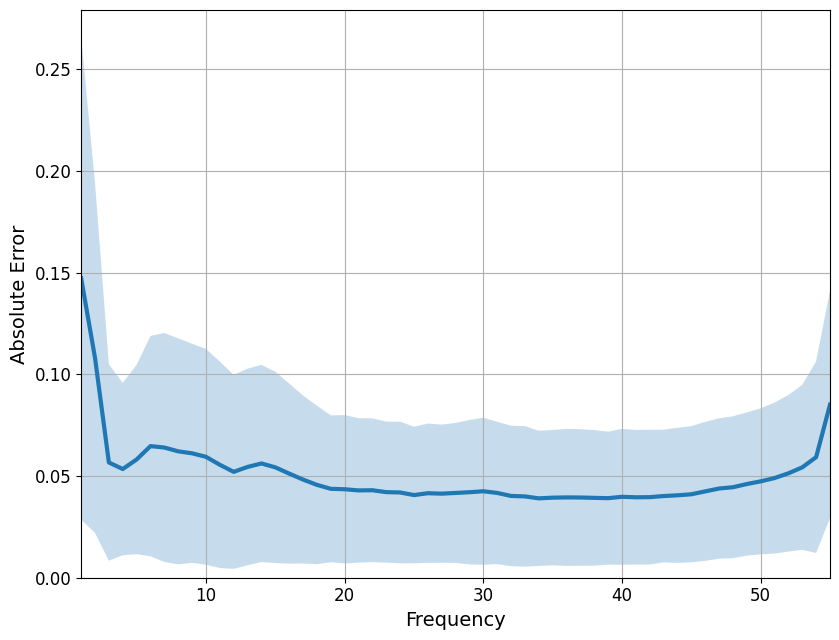

In [2]:
fg, model_dir = assess_model_fit(mat_file_path="../results/exergame_session1_PowerSpectrumResults.mat", peak_width_limits=[2,8], min_peak_height=0.2, peak_threshold=2,max_n_peaks=6,freq_range=[1,55], underfit_threshold=0.8, error_threshold=0.1)

In [4]:
errors = fg.get_params('error')
# Using mean + k*std for error outliers (higher errors are worse)
error_mean = np.mean(errors)
error_std = np.std(errors)
error_threshold = error_mean + 3 * error_std  # 3-sigma rule for extreme outliers

# Finding Threshold of R^2
r2s = fg.get_params('r_squared')
# Using mean - k*std for R^2 outliers (lower R^2 values are worse)
r2_mean = np.mean(r2s)
r2_std = np.std(r2s)
r2_threshold = r2_mean - 3 * r2_std  # 3-sigma rule for extreme outliers

print(f"Error Threshold: {error_threshold} & R^2 Threshold: {r2_threshold}")

Error Threshold: 0.10286669726421332 & R^2 Threshold: 0.559030472634249


File appears to be MATLAB v7.3 format, loading with h5py...
Successfully loaded as HDF5/v7.3 file: ../results/exergame_session1_PowerSpectrumResults.mat
Available variables in .mat file:
  - #refs#: <class 'h5py._hl.group.Group'>
  - results: <class 'h5py._hl.group.Group'>
Results is a structured array (Group)
Available fields in results: ['cluster', 'component', 'experience', 'filename', 'freqs', 'icaact', 'session', 'spectra', 'subject']
Checking field 'subject' with shape: (6055, 1)
Determined 6055 entries from field 'subject'
Processing 6055 entries in results
Processed 500/6055 entries...
Processed 1000/6055 entries...
Processed 1500/6055 entries...
Processed 2000/6055 entries...
Processed 2500/6055 entries...
Processed 3000/6055 entries...
Processed 3500/6055 entries...
Processed 4000/6055 entries...
Processed 4500/6055 entries...
Processed 5000/6055 entries...
Processed 5500/6055 entries...
Processed 6000/6055 entries...

Extracted data summary:
  Total entries: 6055
  Unique su

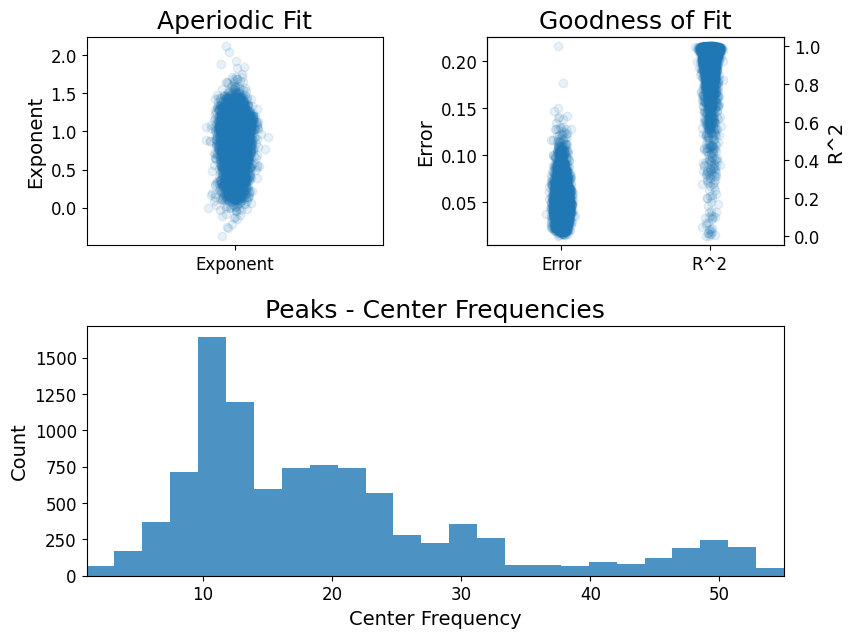

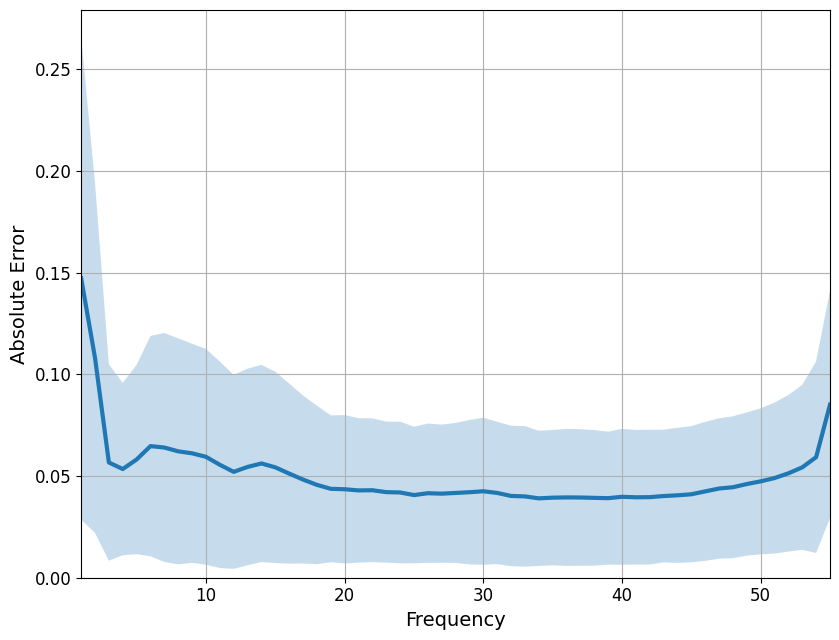

In [5]:
fg_v2, model_dir_v2 = assess_model_fit(mat_file_path="../results/exergame_session1_PowerSpectrumResults.mat", peak_width_limits=[2,8], min_peak_height=0.2, peak_threshold=2,max_n_peaks=6,freq_range=[1,55], underfit_threshold=0.559, error_threshold=0.103)